In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px

In [20]:
data = pd.read_csv('Shark Tank India.csv')
data.head()

,Season Number,Season Start,Season End,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,...,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Guest Name
0,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,1,BluePineFoods,Food,Frozen Momos,https://bluepinefoods.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,2,BoozScooters,Vehicles/Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,3,HeartUpMySleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",4,TagzFoods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",5,HeadAndHeart,Education,Brain Development Course,https://thehnh.in/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data.shape

(320, 64)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              320 non-null    int64  
 1   Season Start               320 non-null    object 
 2   Season End                 320 non-null    object 
 3   Episode Number             320 non-null    int64  
 4   Episode Title              320 non-null    object 
 5   Pitch Number               320 non-null    int64  
 6   Startup Name               320 non-null    object 
 7   Industry                   320 non-null    object 
 8   Business Description       320 non-null    object 
 9   Company Website            309 non-null    object 
 10  Number of Presenters       320 non-null    int64  
 11  Male Presenters            281 non-null    float64
 12  Female Presenters          149 non-null    float64
 13  Transgender Presenters     3 non-null      float64

In [23]:
data.describe()

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Started in,Yearly Revenue,...,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount
count,320.000000,320.000000,320.000000,320.000000,281.000000,149.000000,3.0,315.000000,184.000000,134.000000,...,11.000000,8.000000,8.000000,0.0,21.000000,21.000000,4.000000,2.000000,2.000000,2.000000
mean,1.525000,21.550000,160.500000,2.078125,1.722420,1.194631,1.0,0.187302,2018.472826,355.947761,...,31.090909,19.998782,6.462500,NaN,38.138571,5.190314,36.250000,32.750000,1.500000,23.500000
std,0.500157,14.676362,92.520268,0.847358,0.866744,0.429925,0.0,0.390774,2.495750,918.888781,...,15.332675,10.946848,5.326199,NaN,26.305707,5.599211,23.935678,10.960155,1.414214,15.556349
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,2005.000000,-1.000000,...,10.000000,0.000253,1.000000,NaN,5.000000,1.000000,10.000000,25.000000,0.500000,12.500000
25%,1.000000,9.000000,80.750000,2.000000,1.000000,1.000000,1.0,0.000000,2017.000000,0.000000,...,23.500000,14.995000,4.050000,NaN,18.750000,1.500000,21.250000,28.875000,1.000000,18.000000
50%,2.000000,21.000000,160.500000,2.000000,2.000000,1.000000,1.0,0.000000,2019.000000,100.000000,...,25.000000,22.500000,5.000000,NaN,30.000000,3.000000,35.000000,32.750000,1.500000,23.500000
75%,2.000000,33.000000,240.250000,2.000000,2.000000,1.000000,1.0,0.000000,2020.000000,247.500000,...,40.000000,26.250000,7.750000,NaN,50.000000,5.000000,50.000000,36.625000,2.000000,29.000000
max,2.000000,51.000000,320.000000,6.000000,6.000000,3.000000,1.0,1.000000,2022.000000,7200.000000,...,60.000000,33.330000,17.500000,NaN,100.000000,20.000000,65.000000,40.500000,2.500000,34.500000


In [24]:
data.isna().any()

Season Number              False
Season Start               False
Season End                 False
Episode Number             False
Episode Title              False
                           ...  
Amit Debt Amount            True
Guest Investment Amount     True
Guest Investment Equity     True
Guest Debt Amount           True
Guest Name                  True
Length: 64, dtype: bool

In [25]:
data.isna().sum()

Season Number                0
Season Start                 0
Season End                   0
Episode Number               0
Episode Title                0
                          ... 
Amit Debt Amount           316
Guest Investment Amount    318
Guest Investment Equity    318
Guest Debt Amount          318
Guest Name                 318
Length: 64, dtype: int64

In [31]:
data.dropna()

,Season Number,Season Start,Season End,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,...,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Guest Name


In [32]:
data.isna().sum()

Season Number                0
Season Start                 0
Season End                   0
Episode Number               0
Episode Title                0
                          ... 
Amit Debt Amount           316
Guest Investment Amount    318
Guest Investment Equity    318
Guest Debt Amount          318
Guest Name                 318
Length: 64, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              0 non-null      int64  
 1   Season Start               0 non-null      object 
 2   Season End                 0 non-null      object 
 3   Episode Number             0 non-null      int64  
 4   Episode Title              0 non-null      object 
 5   Pitch Number               0 non-null      int64  
 6   Startup Name               0 non-null      object 
 7   Industry                   0 non-null      object 
 8   Business Description       0 non-null      object 
 9   Company Website            0 non-null      object 
 10  Number of Presenters       0 non-null      int64  
 11  Male Presenters            0 non-null      float64
 12  Female Presenters          0 non-null      float64
 13  Transgender Presenters     0 non-null      float64
 14  Couple

In [29]:
data.head()

,Season Number,Season Start,Season End,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,...,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Guest Name
0,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,1,BluePineFoods,Food,Frozen Momos,https://bluepinefoods.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,2,BoozScooters,Vehicles/Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,3,HeartUpMySleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",4,TagzFoods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",5,HeadAndHeart,Education,Brain Development Course,https://thehnh.in/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.duplicated().any()

False

In [33]:
print(data['Season Number'].max(), " Total seasons \n")
print(data['Episode Number'].max(), "Total number of episodes \n")
print(data['Pitch Number'].max(), "Number of startup companies came for pitching in both seasons \n")

2  Total seasons 

51 Total number of episodes 

320 Number of startup companies came for pitching in both seasons 



In [34]:
# Filter data for Season 1
season_1_data = data[data['Season Number'] == 1]

In [35]:
# Filter data for season 2
season_2_data = data[data['Season Number']== 2]

In [36]:
season_1_count = season_1_data['Pitchers City'].value_counts()

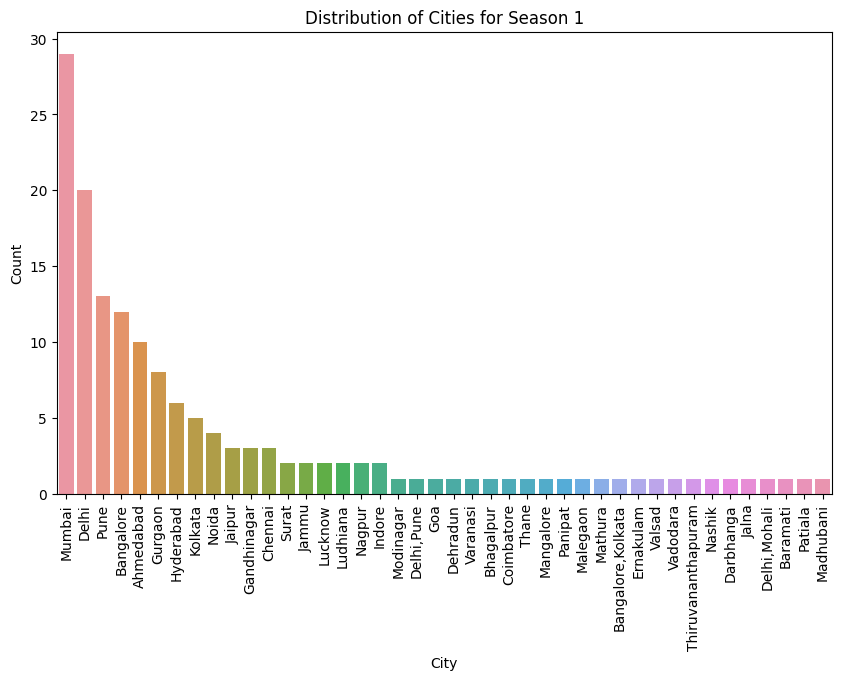

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x=season_1_count.index, y=season_1_count.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Cities for Season 1')
plt.show()

In [38]:
season_2_counts = season_2_data['Pitchers City'].value_counts()

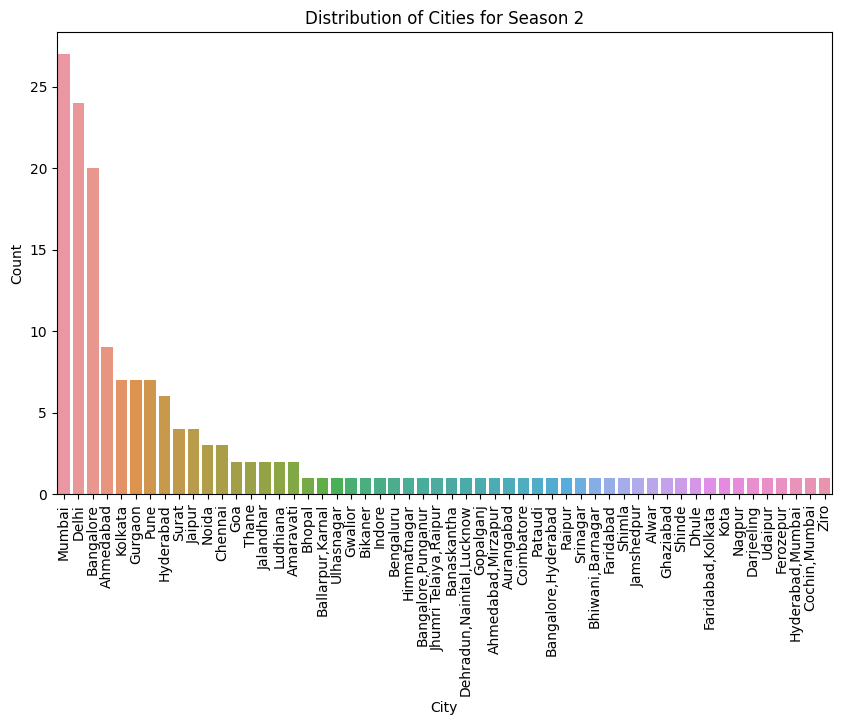

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=season_2_counts.index, y=season_2_counts.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Cities for Season 2')
plt.show()

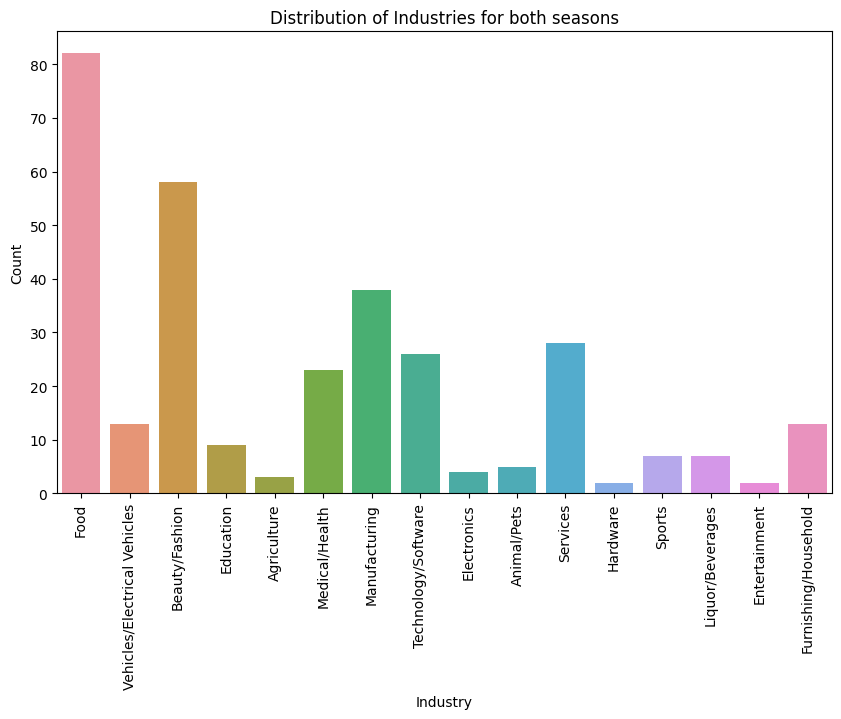

In [41]:
#Distribution of different industries that came for pitching in both the Seasons:
plt.figure(figsize=(10, 6))
sns.countplot(x='Industry', data = data)
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Distribution of Industries for both seasons')
plt.show()

In [42]:
tmp = data['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Different Industries came in Shark Tank India in Season 1 and 2 </b>", color = 'Industry',template='simple_white', text=tmp)
fig.show()

In [43]:
#Entreprenuers:
print('FOR SEASON 1','\n')
print('Total Entrepreneurs-', season_1_data['Number of Presenters'].sum(), "\n")
print('Total Male Entrepreneurs-',  season_1_data['Male Presenters'].sum(), "\n")
print("Male entrepreneurs percentage - ", round( season_1_data['Male Presenters'].sum()/ season_1_data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Female Entrepreneurs-',  season_1_data['Female Presenters'].sum(), "\n")
print("Female entrepreneurs percentage - ", round( season_1_data['Female Presenters'].sum()/ season_1_data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Transgender Entrepreneurs-',  season_1_data['Transgender Presenters'].sum(), "\n")
print("Transgender entrepreneurs percentage - ", round( season_1_data['Transgender Presenters'].sum()/ season_1_data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Couple Entrepreneurs-',  season_1_data['Couple Presenters'].sum(), "\n")
print("Couple entrepreneurs percentage - ", round( season_1_data['Couple Presenters'].sum()/ season_1_data['Number of Presenters'].sum()*100,2), '\n', sep ='')

FOR SEASON 1 

Total Entrepreneurs- 314 

Total Male Entrepreneurs- 220.0 

Male entrepreneurs percentage - 70.06%

Total Female Entrepreneurs- 92.0 

Female entrepreneurs percentage - 29.3%

Total Transgender Entrepreneurs- 2.0 

Transgender entrepreneurs percentage - 0.64%

Total Couple Entrepreneurs- 32.0 

Couple entrepreneurs percentage - 10.19



In [44]:
print('FOR SEASON 2','\n')
print('Total Entrepreneurs-', season_2_data['Number of Presenters'].sum(), "\n")
print('Total Male Entrepreneurs-', season_2_data['Male Presenters'].sum(), "\n")
print("Male entrepreneurs percentage - ", round(season_2_data['Male Presenters'].sum()/season_2_data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Female Entrepreneurs-', season_2_data['Female Presenters'].sum(), "\n")
print("Female entrepreneurs percentage - ", round(season_2_data['Female Presenters'].sum()/season_2_data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Transgender Entrepreneurs-', season_2_data['Transgender Presenters'].sum(), "\n")
print("Transgender entrepreneurs percentage - ", round(season_2_data['Transgender Presenters'].sum()/season_2_data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Couple Entrepreneurs-', season_2_data['Couple Presenters'].sum(), "\n")
print("Couple entrepreneurs percentage - ", round(season_2_data['Couple Presenters'].sum()/season_2_data['Number of Presenters'].sum()*100,2), "%\n", sep='')

FOR SEASON 2 

Total Entrepreneurs- 351 

Total Male Entrepreneurs- 264.0 

Male entrepreneurs percentage - 75.21%

Total Female Entrepreneurs- 86.0 

Female entrepreneurs percentage - 24.5%

Total Transgender Entrepreneurs- 1.0 

Transgender entrepreneurs percentage - 0.28%

Total Couple Entrepreneurs- 27.0 

Couple entrepreneurs percentage - 7.69%



In [47]:
print('For Both Seasons','\n')
print('Total Entrepreneurs-', data['Number of Presenters'].sum(), "\n")
print('Total Male Entrepreneurs-', data['Male Presenters'].sum(), "\n")
print("Male entrepreneurs percentage - ", round(data['Male Presenters'].sum()/data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Female Entrepreneurs-', data['Female Presenters'].sum(), "\n")
print("Female entrepreneurs percentage - ", round(data['Female Presenters'].sum()/data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Transgender Entrepreneurs-', data['Transgender Presenters'].sum(), "\n")
print("Transgender entrepreneurs percentage - ", round(data['Transgender Presenters'].sum()/data['Number of Presenters'].sum()*100,2), "%\n", sep='')
print('Total Couple Entrepreneurs-', data['Couple Presenters'].sum(), "\n")
print("Couple entrepreneurs percentage - ", round(data['Couple Presenters'].sum()/data['Number of Presenters'].sum()*100,2), "%\n", sep='')

For Both Seasons 

Total Entrepreneurs- 665 

Total Male Entrepreneurs- 484.0 

Male entrepreneurs percentage - 72.78%

Total Female Entrepreneurs- 178.0 

Female entrepreneurs percentage - 26.77%

Total Transgender Entrepreneurs- 3.0 

Transgender entrepreneurs percentage - 0.45%

Total Couple Entrepreneurs- 59.0 

Couple entrepreneurs percentage - 8.87%



In [54]:
#Top 10 Highest Yearly Revenue of the brands in Season 1
print(season_1_data.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

tmpdf = season_1_data.sort_values('Yearly Revenue', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", title="Highest Revenue of the pitches in Season 1", text=tmpdf['Yearly Revenue'].map(int))
fig.show()

Startup Name
FrenchCrown          7200.0
GuardianGears        2500.0
RaisingSuperstars    1300.0
Eume                 1200.0
PlayBoxTV            1020.0
Alpino               1000.0
HammerLifestyle      1000.0
ShadesofSpring        900.0
TagzFoods             700.0
Devnagri              500.0
Name: Yearly Revenue, dtype: float64


In [55]:
#Top 10 Highest Yearly Revenue of the brands in Season 2
print(season_2_data.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

tmpdf = season_2_data.sort_values('Yearly Revenue', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", title="Highest Revenue of the pitches in Season 2", text=tmpdf['Yearly Revenue'].map(int))
fig.show()

Startup Name
Rubans               5100.0
Toyshine             4500.0
GunjanAppsStudios    2400.0
UnStop               1600.0
StyloBug             1400.0
DesmondJi            1200.0
oyehappy             1005.0
BlueTea              1000.0
Aadvik                720.0
NishHair              670.0
Name: Yearly Revenue, dtype: float64


In [57]:
#Top 10 Highest Gross margins of the brands in Season 1
print(season_1_data.groupby('Startup Name')['Gross Margin'].max().nlargest(10))
tmpdf = season_1_data.sort_values('Gross Margin', ascending = False)[0:10]
fig= px.bar(tmpdf, x= "Startup Name", y = "Gross Margin", color = "Startup Name", title = "Highest Gross Margin of the brands in Season 1", text = tmpdf['Gross Margin'].map(int))
fig.show()

Startup Name
Poo-de-Cologne      150.0
Farda               115.0
Cocofit              95.0
Auli                 80.0
CosIQ                75.0
TheaandSid           75.0
Bummer               70.0
FrenchCrown          70.0
Moonshine            70.0
NomadFoodProject     70.0
Name: Gross Margin, dtype: float64


In [58]:
#Top 10 Highest Gross margin of the brand in Season 2
print(season_2_data.groupby('Startup Name')["Gross Margin"].max().nlargest(10))
tmpdf = season_2_data.sort_values('Gross Margin', ascending=False)[0:10]
fig = px.bar(tmpdf, x = 'Startup Name', y = 'Gross Margin', color = 'Startup Name',title = 'Highest Gross margin of the brands in season 2', text = tmpdf['Gross Margin'].map(int))
fig.show()

Startup Name
UnStop                90.0
MidNightAngelsByPC    83.0
LeafyAffair           80.0
Pflow                 80.0
ekatra                80.0
oyehappy              80.0
Dabble                75.0
JaipurWatchCompany    75.0
CraveRajaFoods        70.0
AvimeeHerbal          69.0
Name: Gross Margin, dtype: float64


For Season 1
1    63%
0    37%
Name: Received Offer, dtype: object 



<ipython-input-59-dd9f86cd8759>:3: FutureWarning:

The default value of regex will change from True to False in a future version.



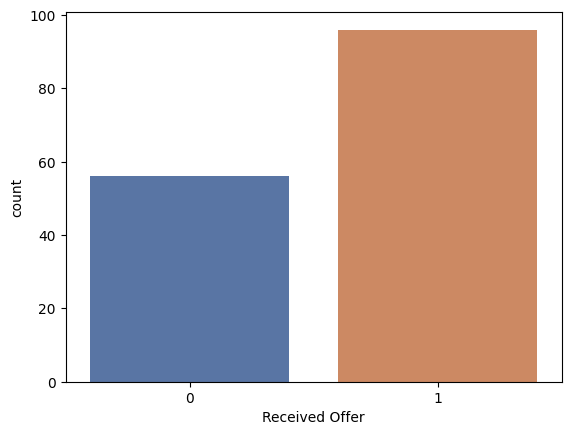

In [59]:
#How many accepted or rejected offer in season 1 and 2
print('For Season 1')
print(round(season_1_data['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Received Offer', data=season_1_data, palette='deep')
plt.show()

For Season 1
1.0    73%
0.0    27%
Name: Accepted Offer, dtype: object 



<ipython-input-60-b078da9e582a>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



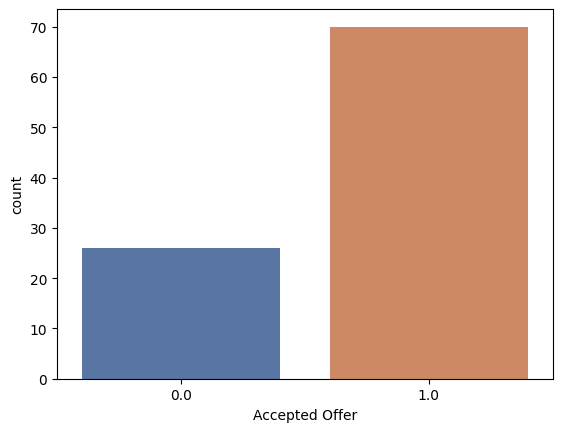

In [60]:
print('For Season 1')
print(round(season_1_data['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Accepted Offer', data=season_1_data, palette='deep')
plt.show()

For Season 2
1    71%
0    29%
Name: Received Offer, dtype: object 



<ipython-input-61-f4ab90e6ca31>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



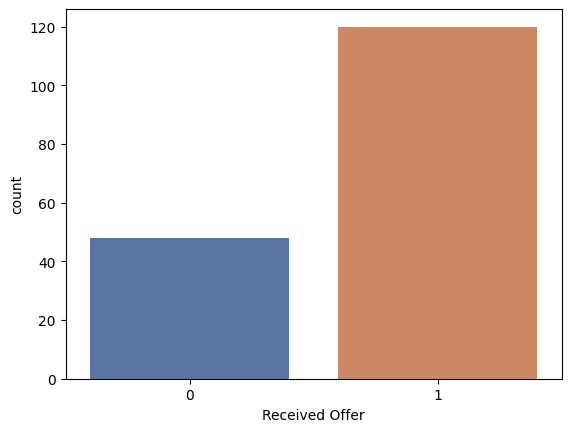

In [61]:
print('For Season 2')
print(round(season_2_data['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Received Offer', data=season_2_data, palette='deep')
plt.show()

For Season 2
1.0    88%
0.0    12%
Name: Accepted Offer, dtype: object 



<ipython-input-62-ad8beda2be17>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



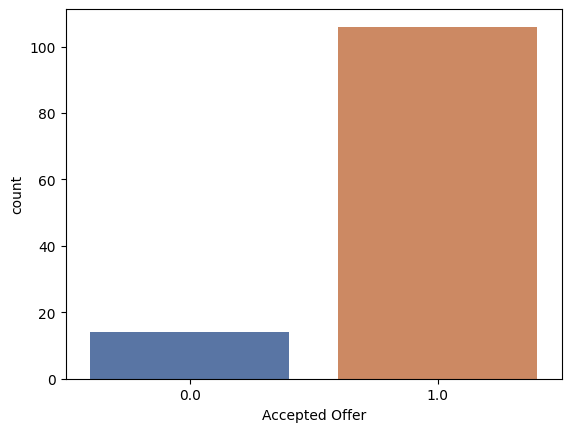

In [62]:
print('For Season 2')
print(round(season_2_data['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Accepted Offer', data=season_2_data, palette='deep')
plt.show()

In [63]:
print('For Season 1 and 2')
print('Total offer receieved for Season 1 and 2')
print(round(data['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%') ,"\n")
print('Total offer accepted for Season 1 and 2')
print(round(data['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")

For Season 1 and 2
Total offer receieved for Season 1 and 2
1    68%
0    32%
Name: Received Offer, dtype: object 

Total offer accepted for Season 1 and 2
1.0    81%
0.0    19%
Name: Accepted Offer, dtype: object 



<ipython-input-63-92cfab27c77e>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-63-92cfab27c77e>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [64]:
print("For Season 1: Companies that rejected the offer are:")
season_1_data.loc[season_1_data['Accepted Offer']==0, ["Startup Name","Original Ask Amount","Original Offered Equity","Valuation Requested"]]

For Season 1: Companies that rejected the offer are:


,Startup Name,Original Ask Amount,Original Offered Equity,Valuation Requested
6,qZenseLabs,100.0,0.25,40000.0
19,Torch-it,75.0,1.00,7500.0
21,LaKheerDeli,50.0,7.50,667.0
27,KabiraHandmad,100.0,5.00,2000.0
41,MorrikoPureFoods,100.0,3.00,3333.0
55,IndiaHempandCo,50.0,4.00,1250.0
60,KetoIndia,150.0,1.25,12000.0
70,Moonshine,80.0,0.50,16000.0
71,Falhari,50.0,2.00,2500.0
73,UrbanMonkey,100.0,1.00,10000.0


In [65]:
print("Season 2: Companies that rejected the offer from Sharks are:")
season_2_data.loc[season_2_data['Accepted Offer']== 0 , ['Startup Name','Original Ask Amount', 'Original Offered Equity','Valuation Requested']]

Season 2: Companies that rejected the offer from Sharks are:


,Startup Name,Original Ask Amount,Original Offered Equity,Valuation Requested
158,ATMOSPHERE,75.0,3.0,2500.000000
165,Flatheads,75.0,3.0,2500.000000
189,Diabexy,150.0,1.0,15000.000000
199,AvimeeHerbal,280.0,0.5,56000.000000
206,PMV,100.0,1.0,10000.000000
212,CheeseCake&Co.,100.0,2.0,5000.000000
215,BeUnic,100.0,10.0,1000.000000
229,GavinParis,50.0,5.0,1000.000000
233,HobbyIndia,50.0,3.0,1666.666667
237,DesiToys,50.0,3.0,1666.666667


Food                            8
Vehicles/Electrical Vehicles    3
Education                       3
Manufacturing                   2
Beauty/Fashion                  2
Animal/Pets                     1
Sports                          1
Technology/Software             1
Name: Industry, dtype: int64


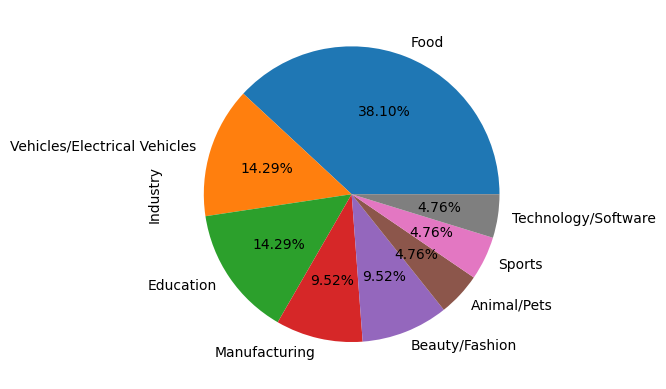

In [67]:
#Industry wise investment of different Sharks in both the season
print(data[data['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
data[data['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf =data.loc[data['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(tmpdf, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name", title="<b>Total equity received by Ashneer (in %) for investment (in lakhs)</b>", text=tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

In [49]:
data.columns

Index(['Season Number', 'Season Start', 'Season End', 'Episode Number',
       'Episode Title', 'Pitch Number', 'Startup Name', 'Industry',
       'Business Description', 'Company Website', 'Number of Presenters',
       'Male Presenters', 'Female Presenters', 'Transgender Presenters',
       'Couple Presenters', 'Pitchers Average Age', 'Started in',
       'Pitchers City', 'Pitchers State', 'Yearly Revenue', 'Monthly Sales',
       'Gross Margin', 'Net Margin', 'Original Ask Amount',
       'Original Offered Equity', 'Valuation Requested', 'Received Offer',
       'Accepted Offer', 'Total Deal Amount', 'Total Deal Equity',
       'Total Deal Debt', 'Debt Interest', 'Deal Valuation',
       'Number of sharks in deal', 'Deal has conditions', 'Has Patents',
       'Ashneer Investment Amount', 'Ashneer Investment Equity',
       'Ashneer Debt Amount', 'Namita Investment Amount',
       'Namita Investment Equity', 'Namita Debt Amount',
       'Anupam Investment Amount', 'Anupam Investment 